In [1]:
import sys
import numpy as np
import pickle
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from MNIST_Dataset_Loader.mnist_loader import MNIST
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')



In [2]:
old_stdout = sys.stdout
log_file = open("summary.log","w")
sys.stdout = log_file


print('\nLoading MNIST Data...')
# data = MNIST('./python-mnist/data/')

data = MNIST('./MNIST_Dataset_Loader/dataset/')

print('\nLoading Training Data...')
img_train, labels_train = data.load_training()
train_img = np.array(img_train)
train_labels = np.array(labels_train)

print('\nLoading Testing Data...')
img_test, labels_test = data.load_testing()
test_img = np.array(img_test)
test_labels = np.array(labels_test)


#Features
X = train_img

#Labels
y = train_labels


In [3]:
print('\nPreparing Classifier Training and Validation Data...')
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size=0.1)


print('\nRandom Forest Classifier with n_estimators = 100, n_jobs = 10')
print('\nPickling the Classifier for Future Use...')
clf = RandomForestClassifier(n_estimators=100, n_jobs=10)
clf.fit(X_train,y_train)

with open('MNIST_RFC.pickle','wb') as f:
    pickle.dump(clf, f)

pickle_in = open('MNIST_RFC.pickle','rb')
clf = pickle.load(pickle_in)

print('\nCalculating Accuracy of trained Classifier...')
confidence = clf.score(X_test,y_test)

print('\nMaking Predictions on Validation Data...')
y_pred = clf.predict(X_test)

print('\nCalculating Accuracy of Predictions...')
accuracy = accuracy_score(y_test, y_pred)

print('\nCreating Confusion Matrix...')
conf_mat = confusion_matrix(y_test,y_pred)


In [6]:
print('\nRFC Trained Classifier Confidence: ',confidence)
print('\nPredicted Values: ',y_pred)
print('\nAccuracy of Classifier on Validation Image Data: ',accuracy)
print('\nConfusion Matrix: \n',conf_mat)


RFC Trained Classifier Confidence:  0.974333333333

Predicted Values:  [4 1 1 ..., 2 8 9]

Accuracy of Classifier on Validation Image Data:  0.974333333333

Confusion Matrix: 
 [[603   0   1   0   0   1   2   0   2   1]
 [  0 671   2   1   2   0   1   1   1   0]
 [  3   0 628   2   1   0   4   2   3   1]
 [  0   0  12 621   0   3   0   4   3   3]
 [  0   0   0   0 558   0   3   0   3   3]
 [  3   1   1   4   0 496   7   0   6   2]
 [  2   0   0   0   1   1 549   0   0   0]
 [  1   0   2   1   6   0   0 586   1   5]
 [  2   2   1   4   2   3   1   0 536   7]
 [  3   0   1   9   5   0   1   3   1 598]]


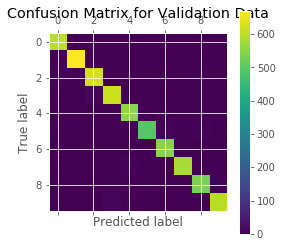

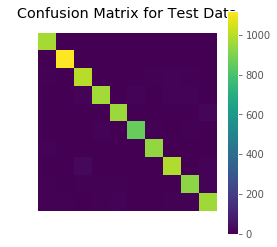

In [4]:

# Plot Confusion Matrix Data as a Matrix
plt.matshow(conf_mat)
plt.title('Confusion Matrix for Validation Data')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


print('\nMaking Predictions on Test Input Images...')
test_labels_pred = clf.predict(test_img)

print('\nCalculating Accuracy of Trained Classifier on Test Data... ')
acc = accuracy_score(test_labels,test_labels_pred)

print('\n Creating Confusion Matrix for Test Data...')
conf_mat_test = confusion_matrix(test_labels,test_labels_pred)

print('\nPredicted Labels for Test Images: ',test_labels_pred)
print('\nAccuracy of Classifier on Test Images: ',acc)
print('\nConfusion Matrix for Test Data: \n',conf_mat_test)

# Plot Confusion Matrix for Test Data
plt.matshow(conf_mat_test)
plt.title('Confusion Matrix for Test Data')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.axis('off')
plt.show()

sys.stdout = old_stdout
log_file.close()



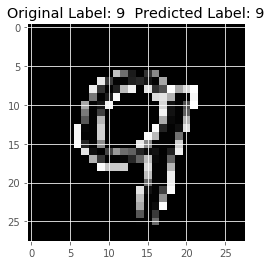

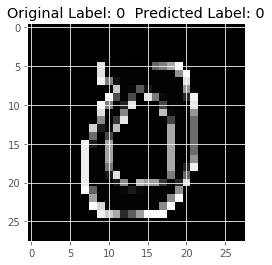

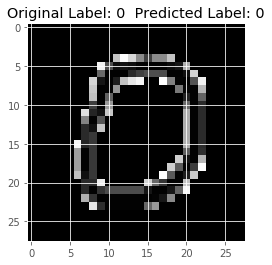

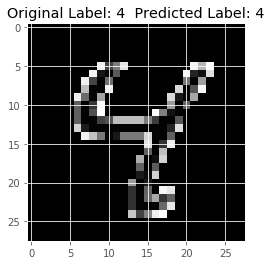

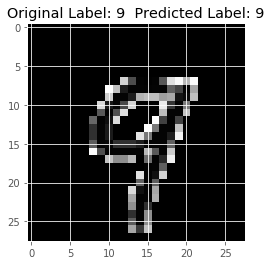

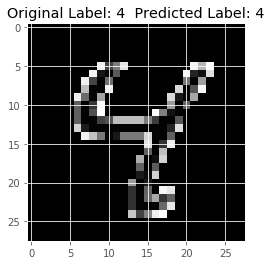

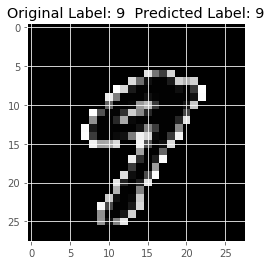

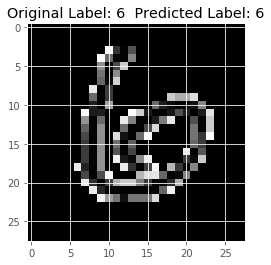

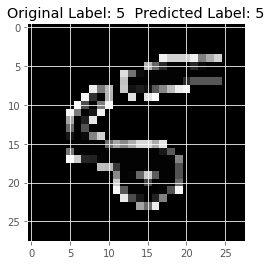

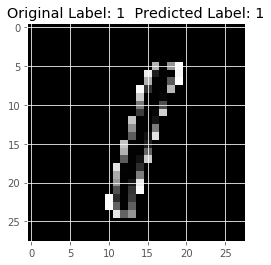

In [7]:
# Show the Test Images with Original and Predicted Labels
a = np.random.randint(1,30,10)
for i in a:
    two_d = (np.reshape(test_img[i], (28, 28)) * 255).astype(np.uint8)
    plt.title('Original Label: {0}  Predicted Label: {1}'.format(test_labels[i],test_labels_pred[i]))
    plt.imshow(two_d, interpolation='nearest',cmap='gray')
    plt.show()